In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import io
from scipy.spatial import distance
from sklearn.neighbors import KNeighborsClassifier


data = """id,X,Y,Class
1,85,78,0
2,47,33,1
3,56,46,1
4,80,37,1
5,52,62,0
6,91,55,0
7,35,78,0
8,65,32,1
9,91,98,1
10,82,91,1"""
df = pd.read_csv(io.StringIO(data), sep=",", index_col='id')
df

,X,Y,Class
id,,,
1,85,78,0
2,47,33,1
3,56,46,1
4,80,37,1
5,52,62,0
6,91,55,0
7,35,78,0
8,65,32,1
9,91,98,1


In [ ]:
new_object = np.array([52,87])

(0.0, 100.0)

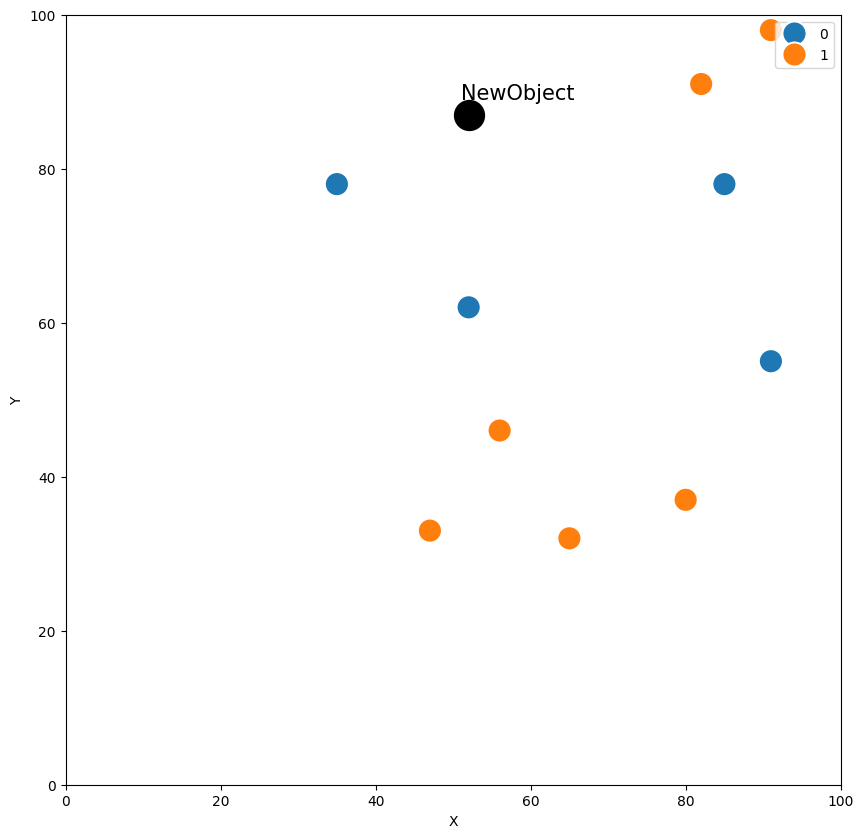

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)
sns.scatterplot(x=df.X, y=df.Y, hue=df.Class, s=300)
sns.scatterplot(x=[new_object[0]], y=[new_object[1]], marker='o', s=600, color='black')
plt.annotate('NewObject', (new_object[0], new_object[1]), xytext = (new_object[0]-1, new_object[1]+2), fontsize=15)
plt.xlim(0, 100)
plt.ylim(0, 100)

In [ ]:
df['Euclidean'] = [distance.euclidean(obj, new_object) for index, obj in df.iloc[:,:2].iterrows()]
df.sort_values('Euclidean').head(3).style.highlight_min(['Euclidean'], color = 'darkgreen', axis = 0)

,X,Y,Class,Euclidean
id,,,,
7,35,78,0,19.235384
5,52,62,0,25.000000
10,82,91,1,30.265492


In [ ]:
df['Manhattan'] = [distance.cityblock(obj, new_object) for index, obj in df.iloc[:,:2].iterrows()]
df.sort_values('Manhattan').head(3).style.highlight_min(['Manhattan'], color = 'darkgreen', axis = 0)

,X,Y,Class,Euclidean,Manhattan
id,,,,,
5,52,62,0,25.000000,25
7,35,78,0,19.235384,26
10,82,91,1,30.265492,34


In [ ]:
X = df.drop(['Class','Euclidean','Manhattan'], axis=1)
y = df['Class']
neigh = KNeighborsClassifier(n_neighbors = 3, p = 1)
neigh.fit(X, y)

KNeighborsClassifier(n_neighbors=3, p=1)

In [ ]:
neigh.predict([new_object])

array([0])